![image](shutterstock_223094779.jpg)

# Fraud Detection

<a id="1"></a>  
#### <p style="padding:5px;background-color:#d5eae9;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 50px 50px;overflow:hidden;font-weight:200">About Data</p>

<div style="background-color:#d5eae9; padding:20px; font-size:15px">
    <strong>Dataset</strong> 
    <br>
    
This dataset is about the information of some customers that we have no details about them and according to that, we are going to do an unsupervised task

<a id="1"></a>  
#### <p style="padding:5px;background-color:#d5eae9;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 50px 50px;overflow:hidden;font-weight:200">Import Dataset</p>

In [6]:
# Data
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from minisom import MiniSom
from sklearn.preprocessing import MinMaxScaler

In [7]:
df = pd.read_csv('E:\Deep Learning\IMT\SOM/Credit_Card_Applications.csv')
df

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,15808223,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
686,15769980,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
687,15675450,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
688,15776494,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1


In [8]:
def check(df):
    l=[]
    columns=df.columns
    for col in columns:
        dtypes=df[col].dtypes
        nunique=df[col].nunique()
        sum_null=df[col].isnull().sum()
        l.append([col,dtypes,nunique,sum_null])
    df_check=pd.DataFrame(l)
    df_check.columns=['column','dtypes','nunique','sum_null']
    return df_check 
check(df)

,column,dtypes,nunique,sum_null
0,CustomerID,int64,690,0
1,A1,int64,2,0
2,A2,float64,350,0
3,A3,float64,215,0
4,A4,int64,3,0
5,A5,int64,14,0
6,A6,int64,8,0
7,A7,float64,132,0
8,A8,int64,2,0
9,A9,int64,2,0


In [9]:
df.describe()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
count,6.900000e+02,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000,690.000000
mean,1.569047e+07,0.678261,31.568203,4.758725,1.766667,7.372464,4.692754,2.223406,0.523188,0.427536,2.40000,0.457971,1.928986,184.014493,1018.385507,0.444928
std,7.150647e+04,0.467482,11.853273,4.978163,0.430063,3.683265,1.992316,3.346513,0.499824,0.495080,4.86294,0.498592,0.298813,172.159274,5210.102598,0.497318
min,1.556571e+07,0.000000,13.750000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,1.563169e+07,0.000000,22.670000,1.000000,2.000000,4.000000,4.000000,0.165000,0.000000,0.000000,0.00000,0.000000,2.000000,80.000000,1.000000,0.000000
50%,1.569016e+07,1.000000,28.625000,2.750000,2.000000,8.000000,4.000000,1.000000,1.000000,0.000000,0.00000,0.000000,2.000000,160.000000,6.000000,0.000000
75%,1.575190e+07,1.000000,37.707500,7.207500,2.000000,10.000000,5.000000,2.625000,1.000000,1.000000,3.00000,1.000000,2.000000,272.000000,396.500000,1.000000
max,1.581544e+07,1.000000,80.250000,28.000000,3.000000,14.000000,9.000000,28.500000,1.000000,1.000000,67.00000,1.000000,3.000000,2000.000000,100001.000000,1.000000


In [16]:
df.columns

Index(['CustomerID', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9',
       'A10', 'A11', 'A12', 'A13', 'A14', 'Class'],
      dtype='object')

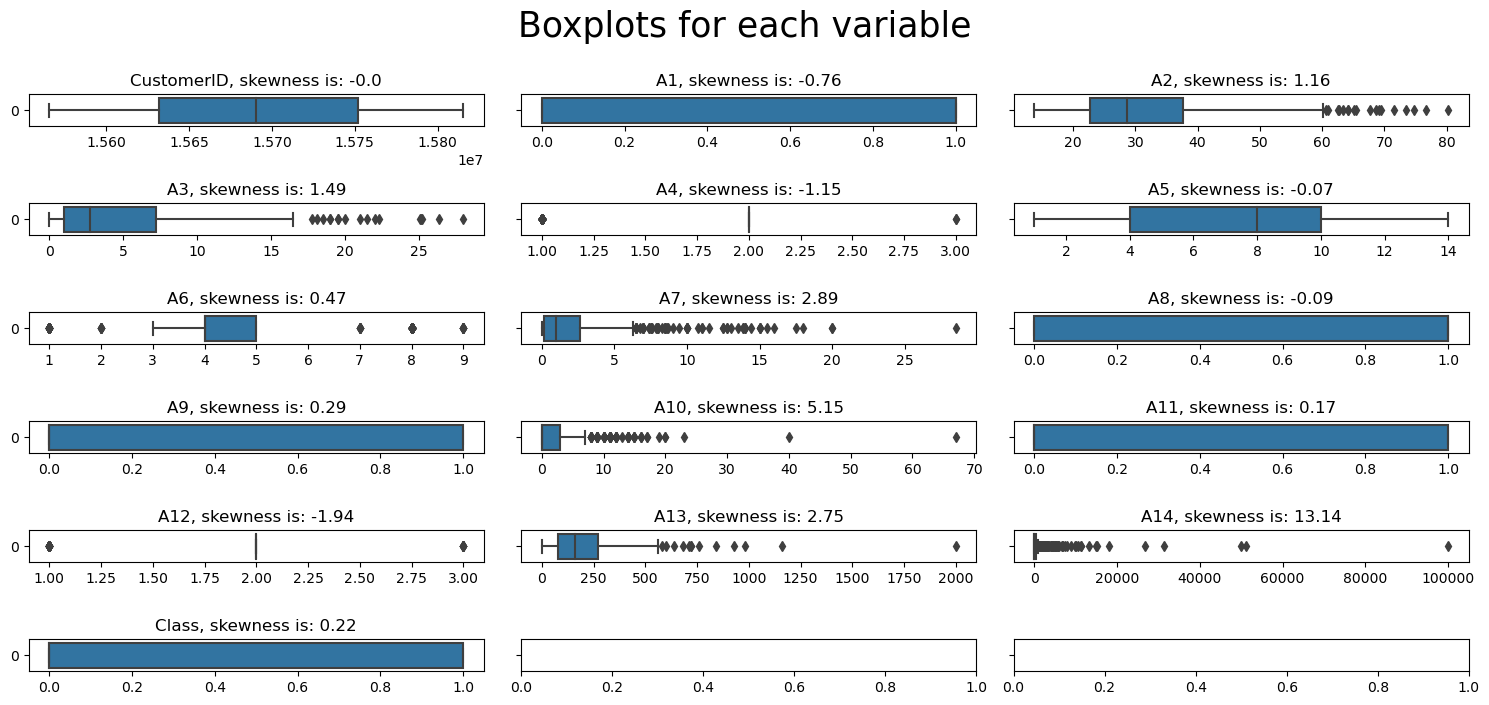

In [18]:
# Visualizing the Numerical Features by boxplots
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(15,7))
    fig.suptitle(suptitle,y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient='h', ax=axs[i])
        axs[i].set_title(data + ', skewness is: '+str(round(dataset[data].skew(axis = 0, skipna = True), 2)))
        
boxplots_custom(dataset=df,  columns_list= df.columns,rows=6, cols=3, suptitle='Boxplots for each variable')
plt.tight_layout()

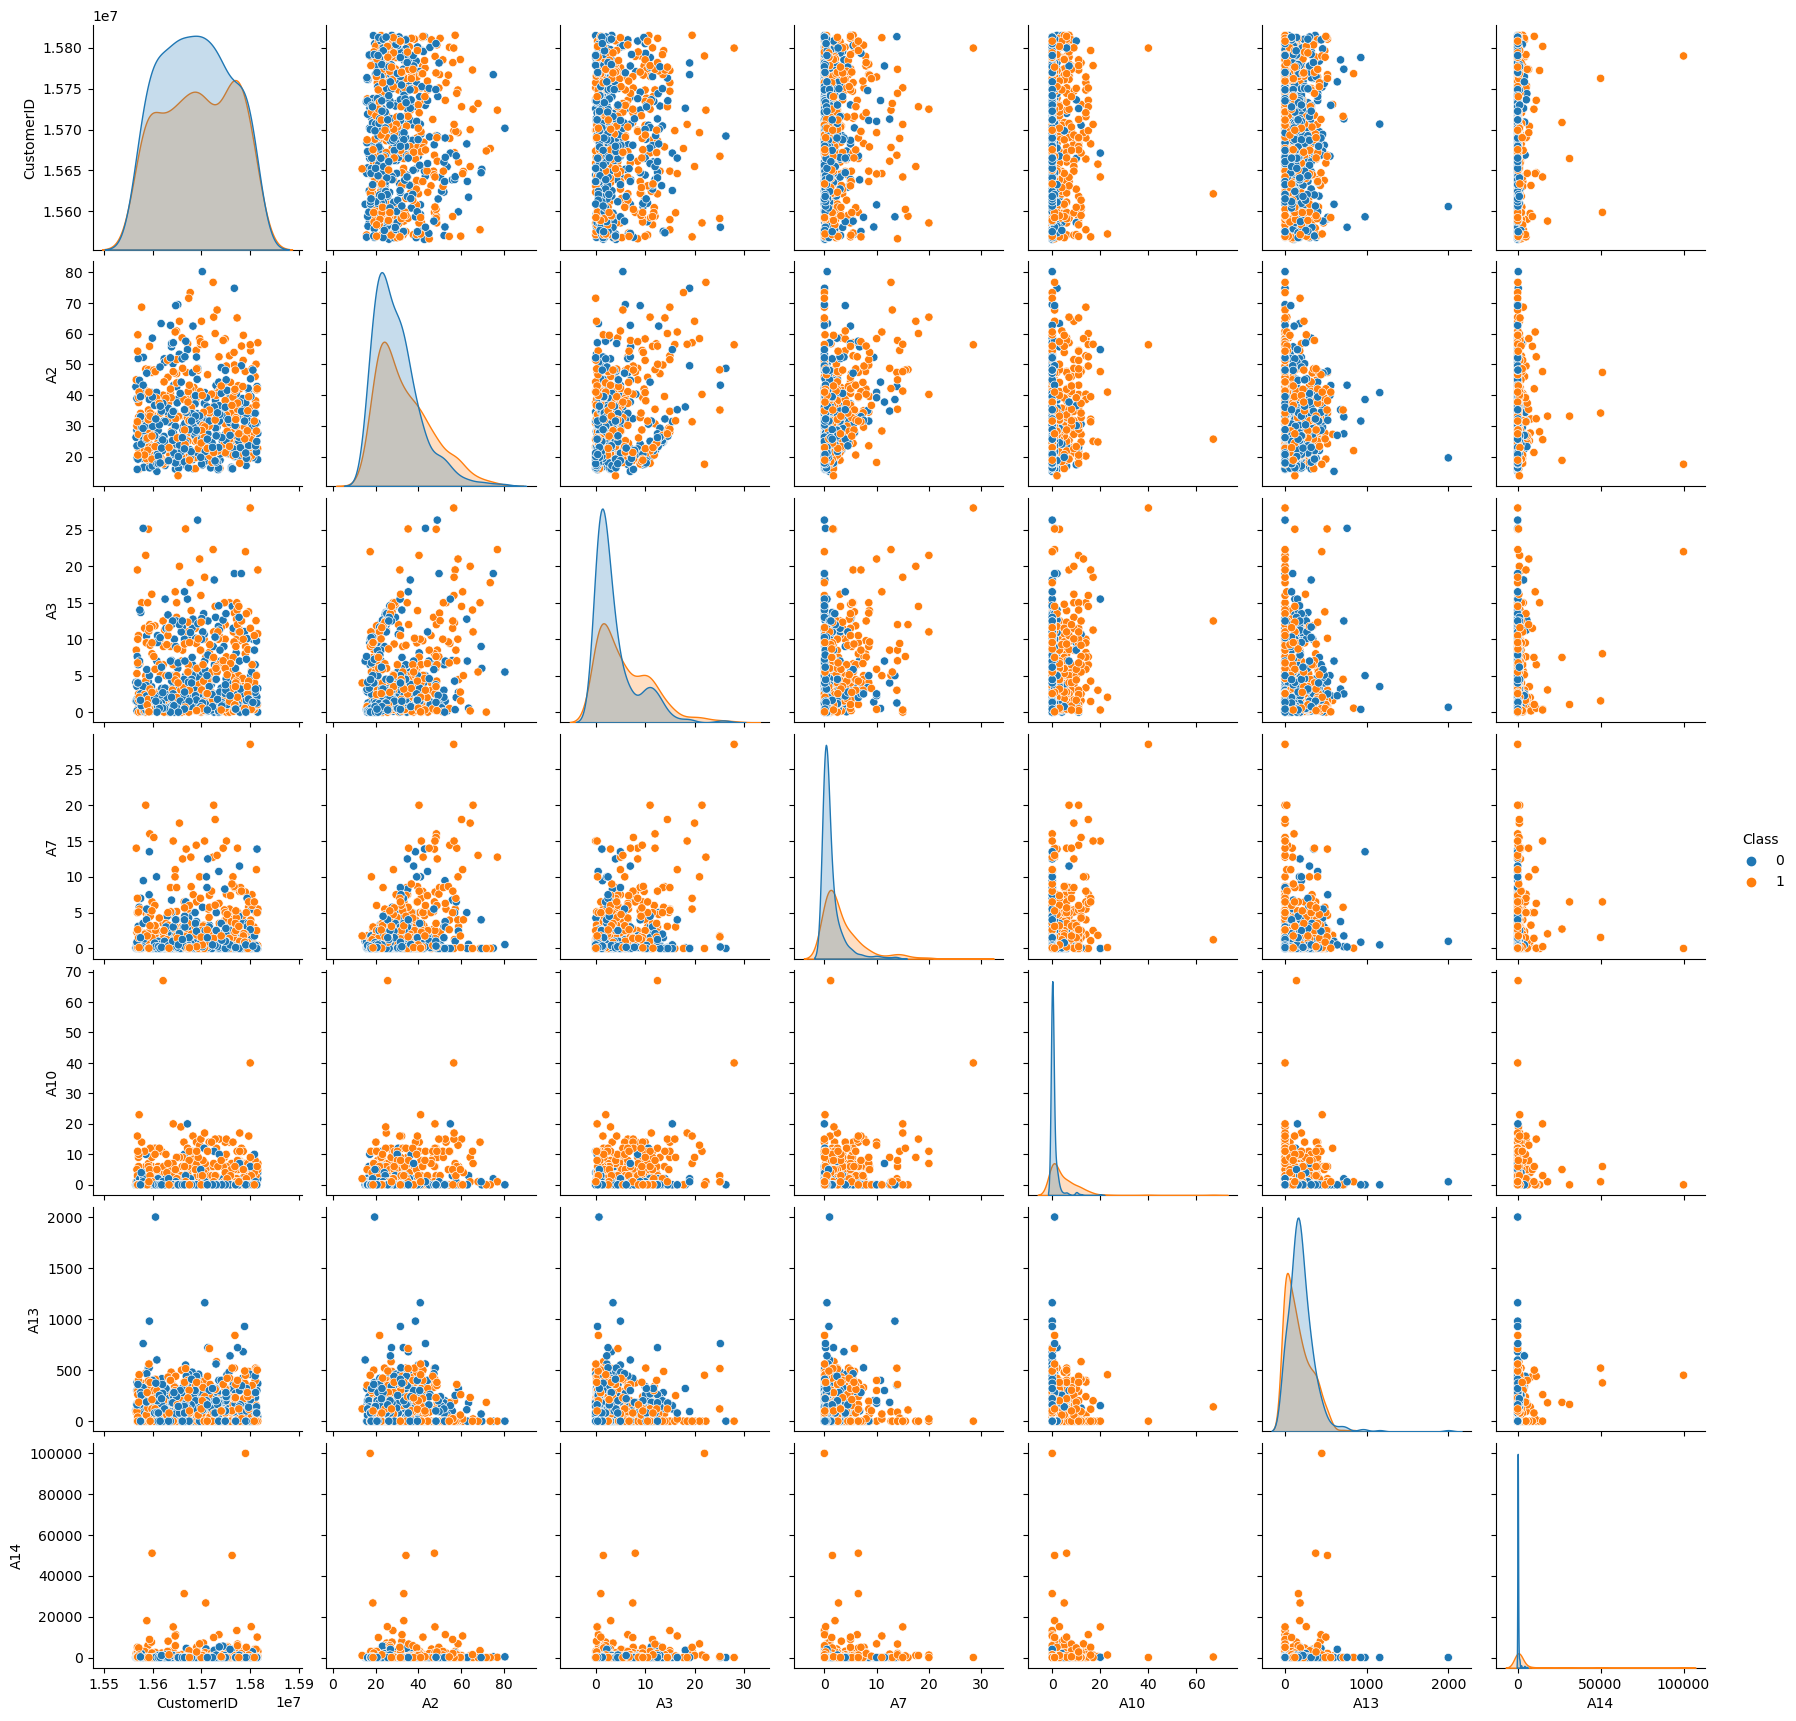

In [21]:
sns.pairplot(data=df[['CustomerID', 'A2', 'A3', 'A7', 'A10', 'A13', 'A14', 'Class']], 
             hue='Class');

In [27]:
cat = pd.DataFrame(df, columns = ['A1', 'A4', 'A5', 'A6', 'A8', 'A9', 'A11', 'A12', 'Class'])

In [ ]:
pd.DataFrame (df_train, columns= ['blue', 'dual_sim', 'four_g', 'n_cores', 'three_g', 'touch_screen', 'wifi'])

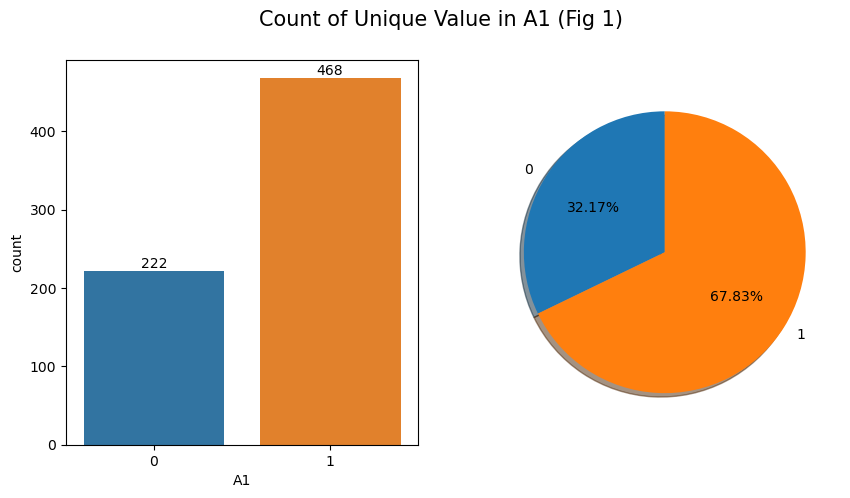

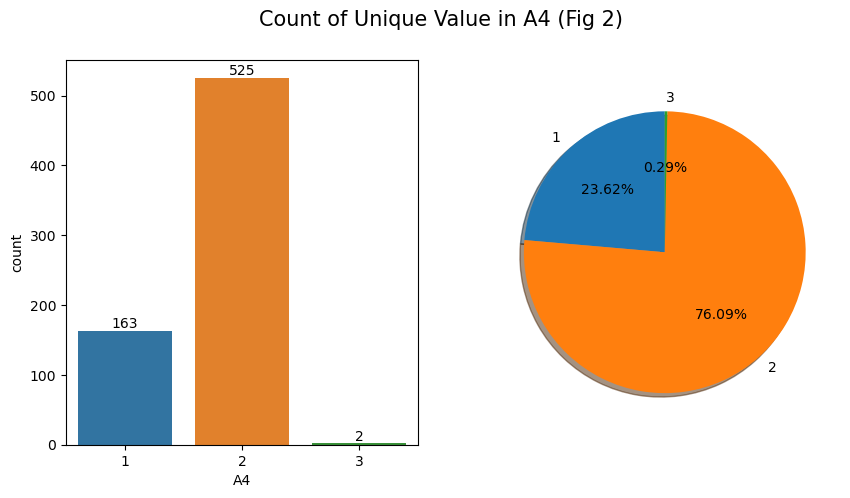

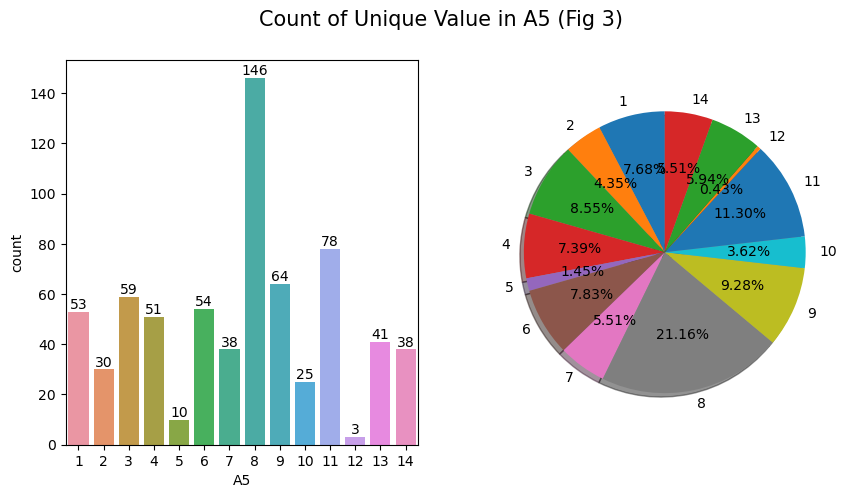

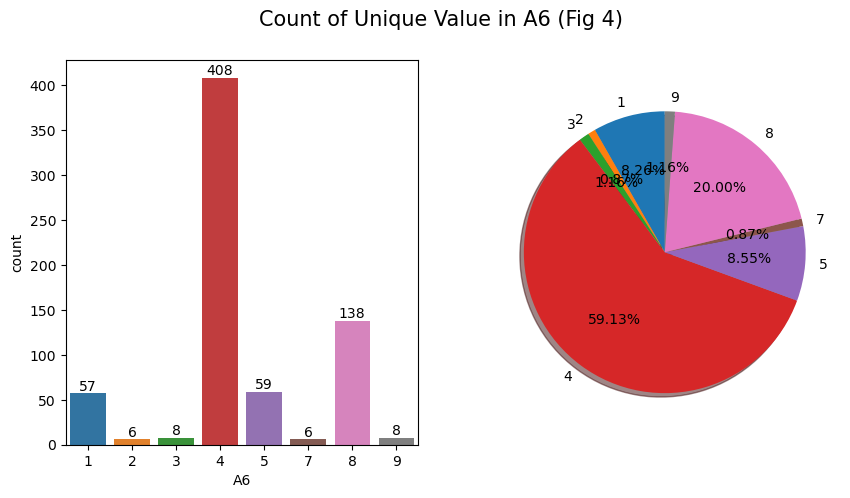

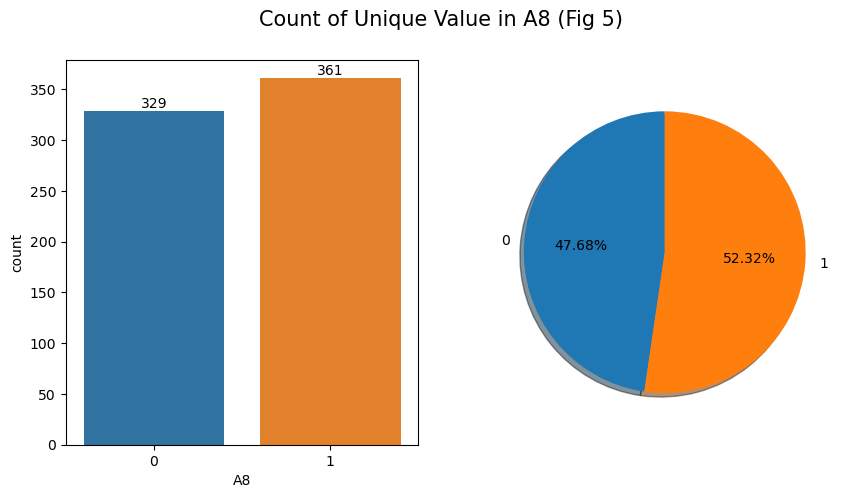

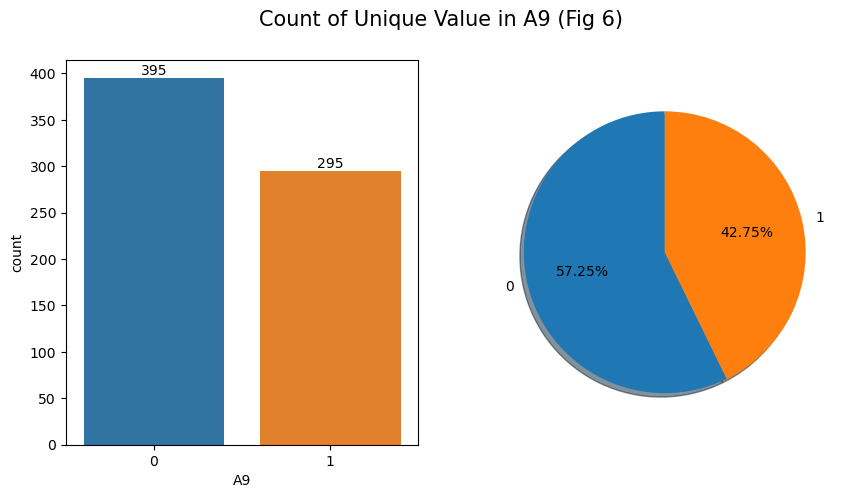

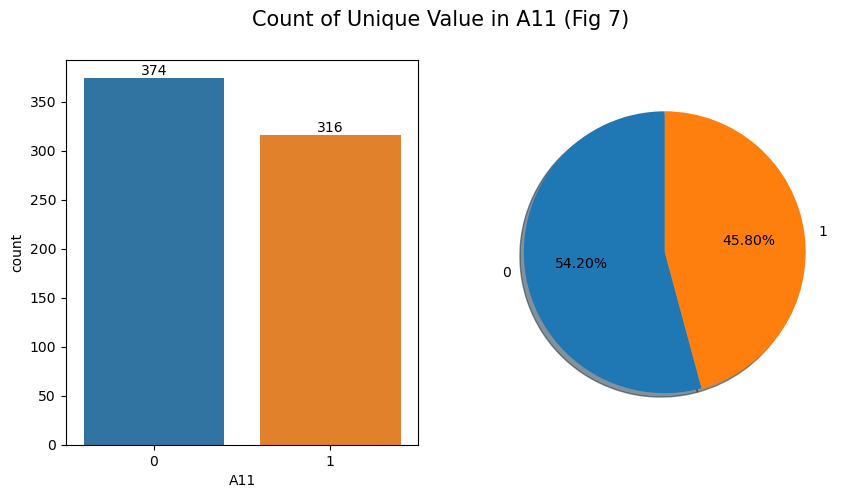

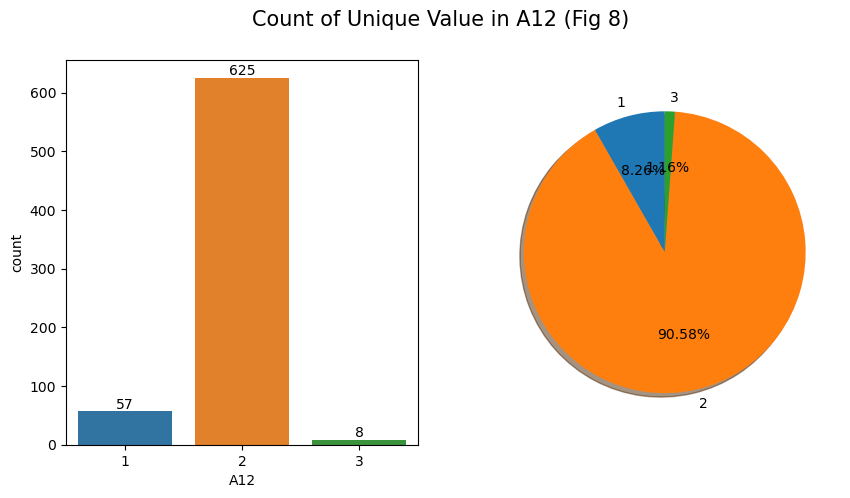

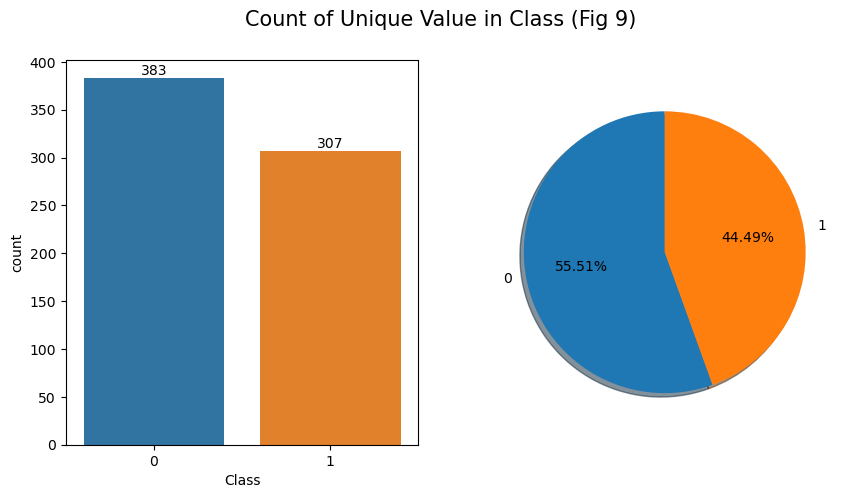

In [28]:
for i, col in enumerate(cat.columns):

    fig, axes = plt.subplots(1,2,figsize=(10,5))
# palette = 'hls'
    # count of col (countplot)
    sns.countplot(data=cat, x=col, ax=axes[0] )
    for container in axes[0].containers:
        axes[0].bar_label(container)
    # count of col (pie chart)
    slices = cat[col].value_counts().sort_index().values
    activities = [var for var in cat[col].value_counts().sort_index().index]
    axes[1].pie(slices, labels=activities, shadow=True, autopct='%1.2f%%' ,startangle=90 )
    
    
 
    plt.suptitle(f'Count of Unique Value in {col} (Fig {i+1})',fontsize=15)
    plt.show()

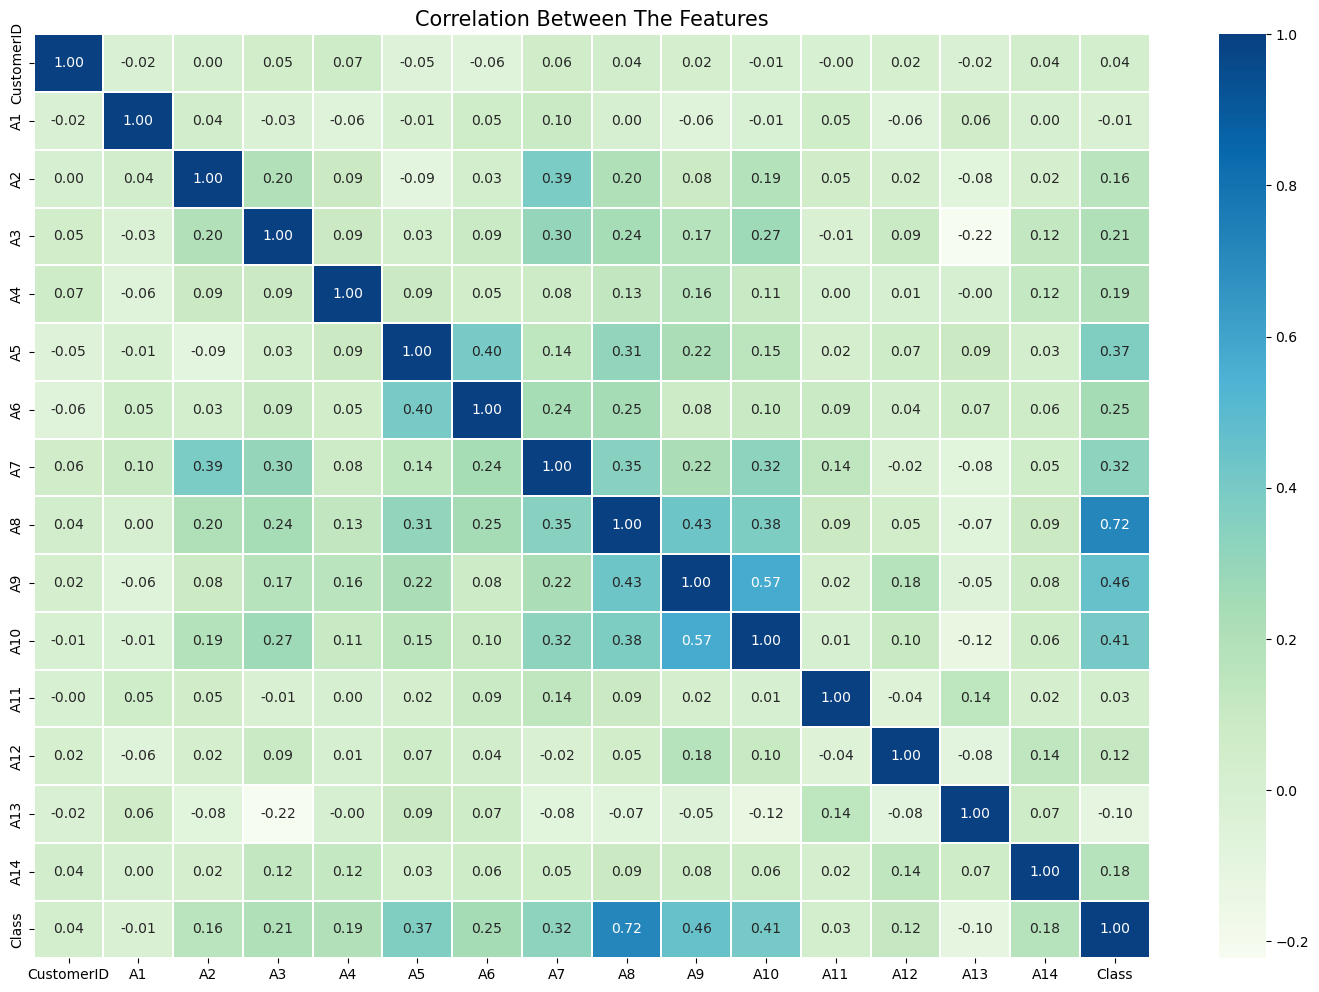

In [29]:
fig=plt.gcf()
fig.set_size_inches(18, 12)
plt.title('Correlation Between The Features', size=15)
a = sns.heatmap(df.corr(), annot = True, cmap = 'GnBu', fmt='.2f', linewidths=0.2)
plt.show()

In [30]:
X = df.drop(columns={"Class"}, axis=1)
y = df["Class"]
label_names = {0:'F', 1:'T'}
type(y)

pandas.core.series.Series

In [31]:
# scaling
Norm = MinMaxScaler(feature_range = (0,1))
Norm.fit(X)
X = Norm.transform(X)
type(X)

numpy.ndarray

<a id="1"></a>  
#### <p style="padding:5px;background-color:#d5eae9;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 50px 50px;overflow:hidden;font-weight:200">Modeling</p>

In [32]:
model = MiniSom(x=10, y=10, input_len= 15, sigma= 1.0, learning_rate = 0.5,random_seed=43)
model.random_weights_init(X)
model.train_random(data = X, num_iteration = 100)

In [33]:
# Finding frauds
find = model.win_map(X)
find.keys() 

dict_keys([(1, 4), (3, 5), (1, 7), (0, 2), (5, 8), (5, 4), (6, 0), (3, 3), (8, 8), (6, 5), (8, 6), (6, 1), (2, 5), (8, 1), (3, 0), (2, 4), (4, 1), (3, 2), (7, 7), (5, 1), (3, 7), (0, 0), (0, 5), (2, 8), (9, 2), (9, 8), (2, 1), (9, 6), (4, 5), (4, 4), (5, 9), (1, 9), (6, 8), (9, 3), (1, 0), (7, 3), (3, 9), (6, 9), (6, 7), (2, 9), (0, 9), (2, 6), (1, 6), (6, 2), (5, 5), (2, 0), (7, 2), (9, 4), (8, 2), (2, 3), (3, 8), (8, 3), (8, 9), (2, 7), (0, 4), (5, 3), (7, 0), (2, 2), (9, 5), (7, 4), (0, 8), (4, 2), (4, 8), (8, 0), (7, 9), (9, 0), (0, 6), (0, 7), (1, 8), (4, 9), (8, 4), (5, 2), (9, 9), (6, 3)])

In [34]:
resault = np.concatenate((find[(2,9)], find[(9,4)]),axis=0)
np.asarray(resault).shape

(18, 15)

In [35]:
resault = Norm.inverse_transform(resault)  #inverse feature scaled to the original values
np.asarray(resault).shape

(18, 15)

In [36]:
print('Detected Customer IDs')
for i in resault[:, 0]:
    print(int(i))

Detected Customer IDs
15636767
15713983
15648681
15763194
15666012
15740411
15790689
15651868
15716082
15651460
15672637
15752344
15736533
15779207
15611409
15609987
15636454
15615296
